### The dataset we are using here is Black Friday dataset taken from Kaggle which contains about 550068 rows and 12 features
### Our aim is to build a model to predict the purchase during Black Friday, using various features
### The dataset has labelled features and are continuous, hence we will build a supervised regression model

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [195]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [196]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [197]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [198]:
train.shape

(550068, 12)

In [199]:
test.shape

(233599, 11)

In [200]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [201]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [202]:
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [203]:
test.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object

### Percentage of missing values 

In [204]:
np.round(train.isnull().sum()/len(train)*100,2).astype(str) + ' %'

User_ID                         0.0 %
Product_ID                      0.0 %
Gender                          0.0 %
Age                             0.0 %
Occupation                      0.0 %
City_Category                   0.0 %
Stay_In_Current_City_Years      0.0 %
Marital_Status                  0.0 %
Product_Category_1              0.0 %
Product_Category_2            31.57 %
Product_Category_3            69.67 %
Purchase                        0.0 %
dtype: object

**The column 'Product_category_3 has 69.67% missing values, hence we will drop the column**

In [205]:
np.round(train.City_Category.value_counts(normalize= True)*100,).astype(str)+'%'

B    42.0%
C    31.0%
A    27.0%
Name: City_Category, dtype: object

In [206]:
np.round(train.Gender.value_counts(normalize= True)*100,).astype(str)+'%'

M    75.0%
F    25.0%
Name: Gender, dtype: object

In [207]:
np.round(train.Age.value_counts(normalize= True)*100,).astype(str)+'%'

26-35    40.0%
36-45    20.0%
18-25    18.0%
46-50     8.0%
51-55     7.0%
55+       4.0%
0-17      3.0%
Name: Age, dtype: object

In [208]:
np.round(train.Stay_In_Current_City_Years.value_counts(normalize= True)*100,).astype(str)+'%'

1     35.0%
2     19.0%
3     17.0%
4+    15.0%
0     14.0%
Name: Stay_In_Current_City_Years, dtype: object

In [209]:
np.round(train.Marital_Status.value_counts(normalize= True)*100,).astype(str)+'%'

0    59.0%
1    41.0%
Name: Marital_Status, dtype: object

### Visualization 

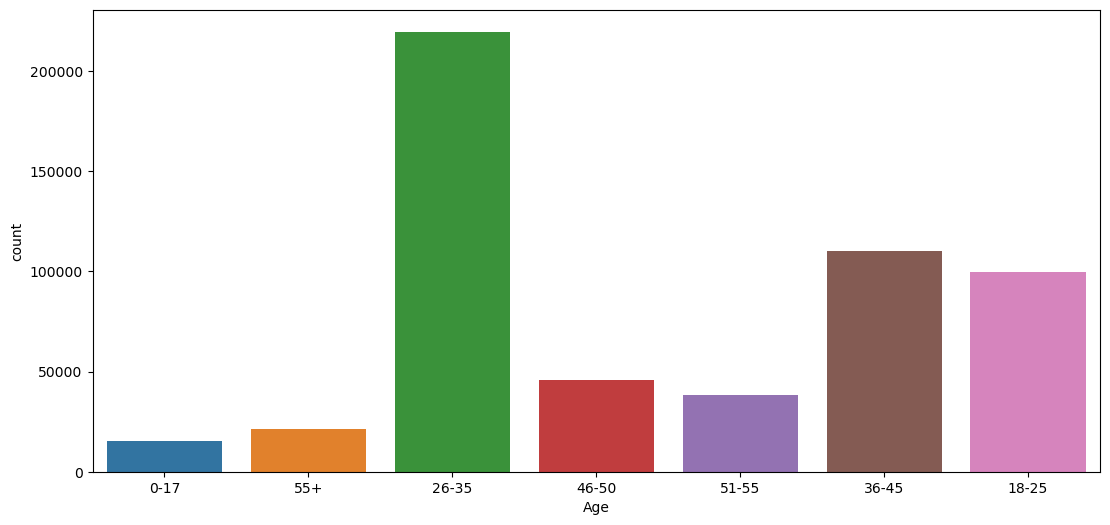

In [210]:
plt.figure(figsize= (13,6))
sns.countplot(train.Age);

**~Most of customers are between the age of 26 to 35**

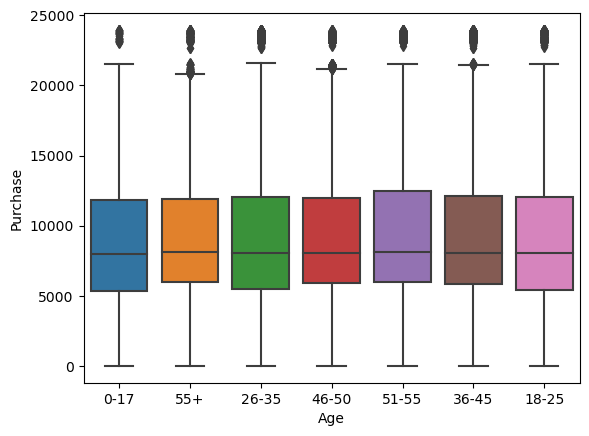

In [211]:
sns.boxplot(train.Age,train.Purchase);

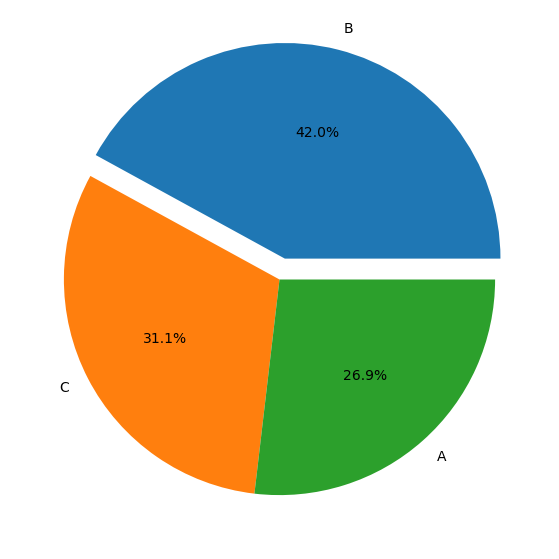

In [212]:
city = train.City_Category.value_counts()
plt.figure(figsize=(10,7))
plt.pie(city.values,labels = city.index,autopct= '%1.1f%%',explode = (0.1,0,0));

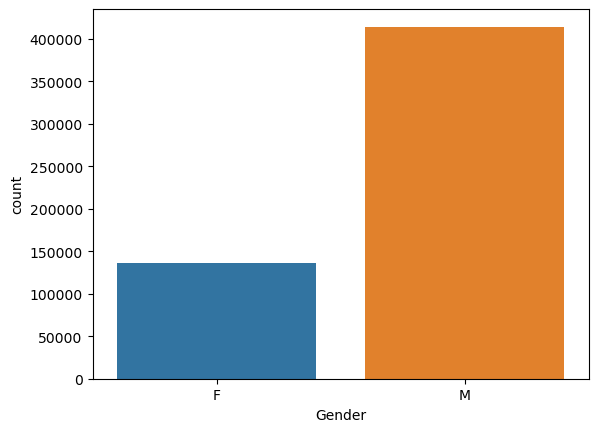

In [213]:
sns.countplot(train.Gender);

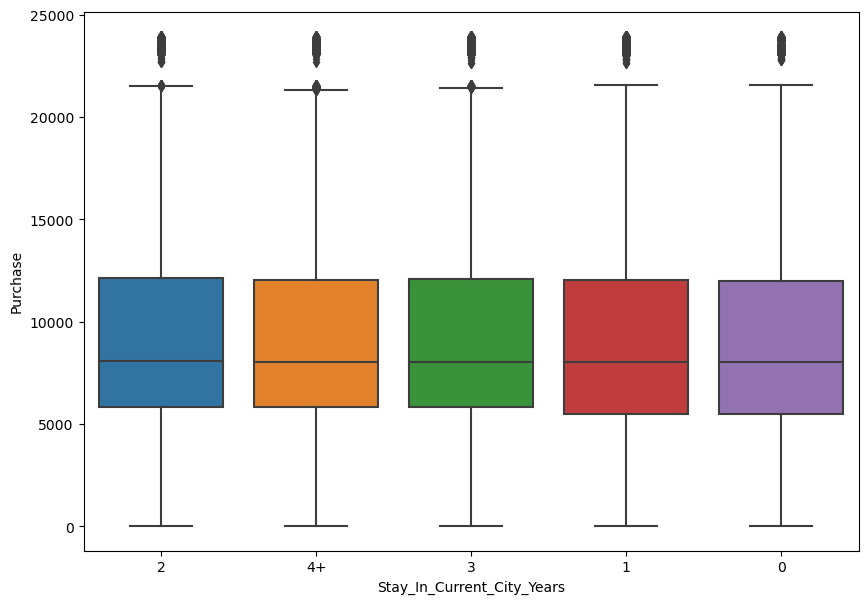

In [214]:
plt.figure(figsize=(10,7))
sns.boxplot(train.Stay_In_Current_City_Years,train.Purchase);

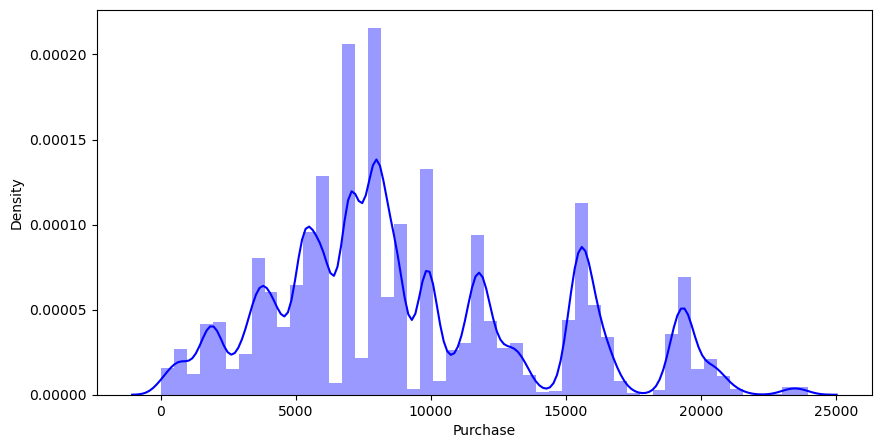

In [215]:
plt.figure(figsize=(10,5))
sns.distplot(train['Purchase'],color='blue');

In [216]:
Age = train.Age.value_counts()

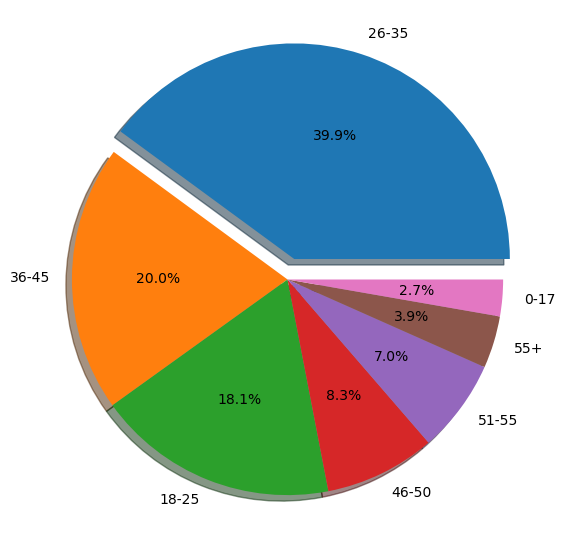

In [217]:
plt.figure(figsize=(10,7))
plt.pie(Age.values,labels = Age.index,autopct= '%1.1f%%',explode= (0.1,0,0,0,0,0,0),shadow= True);

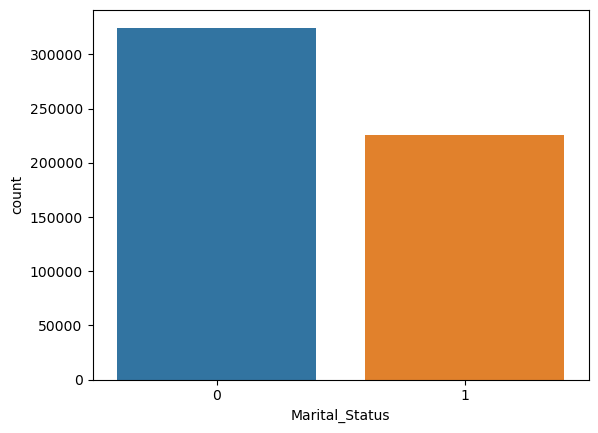

In [218]:
sns.countplot(train.Marital_Status);

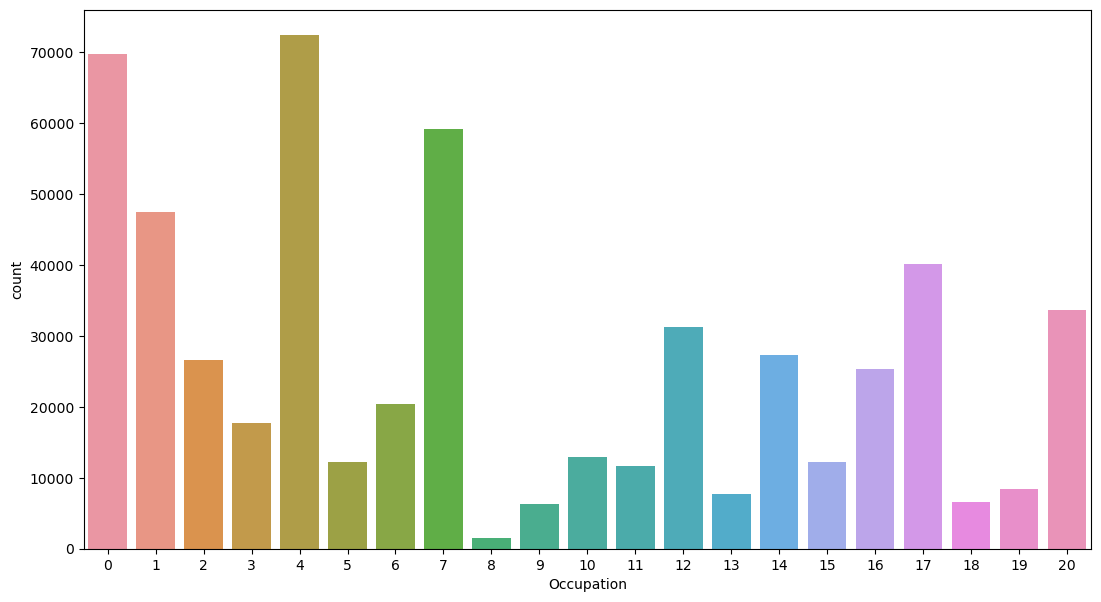

In [219]:
plt.figure(figsize = (13,7))
sns.countplot(train.Occupation);

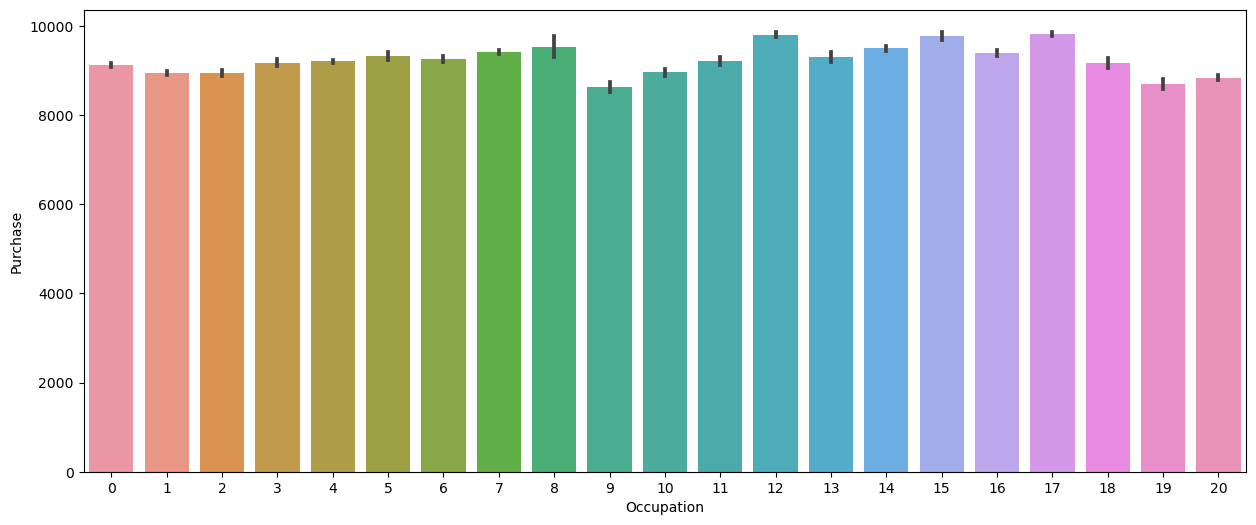

In [220]:
plt.figure(figsize = (15,6))
sns.barplot(train['Occupation'], train['Purchase']);

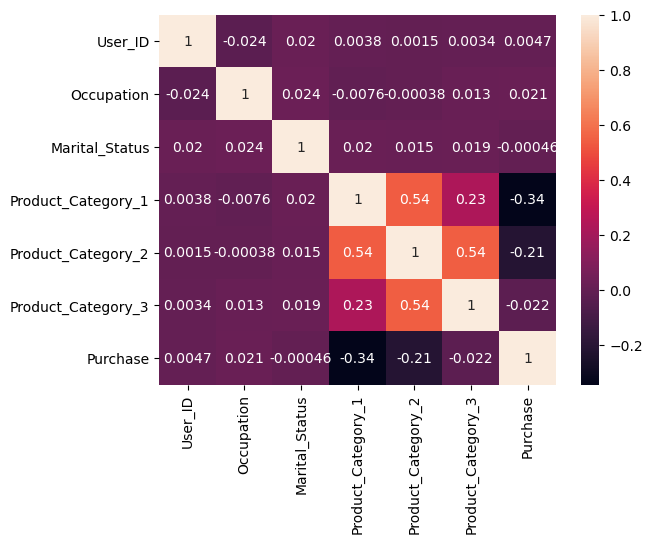

In [221]:
sns.heatmap(train.corr(),annot = True);

**Product_category_1 and Product_category_2 are highly correlated**

**Before processing data,we will combine train and test into a single dataset**

In [222]:
train['source'] = 'train'
test['source'] = 'test'

In [223]:
df = pd.concat([train,test])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train


In [224]:
df.shape

(783667, 13)

In [225]:
df.Age = df.Age.apply(lambda x:str(x).replace('55+','55'))

In [226]:
df.Stay_In_Current_City_Years = df.Stay_In_Current_City_Years.apply(lambda x:str(x).replace('4+','4'))

### Dropping irrelevant columns 

In [227]:
df.drop('Product_Category_3', axis = 1, inplace = True)
df.drop('User_ID', axis = 1, inplace = True)
df.drop('Product_ID', axis = 1, inplace = True)

In [228]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,source
0,F,0-17,10,A,2,0,3,NaN,8370.0,train
1,F,0-17,10,A,2,0,1,6.0,15200.0,train
2,F,0-17,10,A,2,0,12,NaN,1422.0,train
3,F,0-17,10,A,2,0,12,14.0,1057.0,train
4,M,55,16,C,4,0,8,NaN,7969.0,train


### Label Encoding 

In [229]:
from sklearn.preprocessing import LabelEncoder
ll = LabelEncoder()

In [230]:
df.Gender = ll.fit_transform(df.Gender)
df.Age = ll.fit_transform(df.Age)
df.City_Category = ll.fit_transform(df.City_Category)

In [231]:
df['Product_Category_2'].fillna(df['Product_Category_2'].median(), inplace = True)

In [232]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,source
0,0,0,10,0,2,0,3,9.0,8370.0,train
1,0,0,10,0,2,0,1,6.0,15200.0,train
2,0,0,10,0,2,0,12,9.0,1422.0,train
3,0,0,10,0,2,0,12,14.0,1057.0,train
4,1,6,16,2,4,0,8,9.0,7969.0,train


In [233]:
df.dtypes

Gender                          int32
Age                             int32
Occupation                      int64
City_Category                   int32
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                      float64
source                         object
dtype: object

In [234]:
df.Stay_In_Current_City_Years = df.Stay_In_Current_City_Years.astype('int')

In [235]:
df.dtypes


Gender                          int32
Age                             int32
Occupation                      int64
City_Category                   int32
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                      float64
source                         object
dtype: object

In [236]:
train = df.loc[df['source'] == 'train']
test = df.loc[df['source'] == 'test']

In [237]:
train.drop('source', axis = 1, inplace = True)
test.drop('source', axis = 1, inplace = True)

In [238]:
x = train.drop('Purchase',axis = 1)
y = train.Purchase

### Scaling the data 

In [239]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
cols = x.columns

In [240]:
x = ss.fit_transform(x)
x = pd.DataFrame(x,columns= cols)


### Train-Test Split 

In [241]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [242]:
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (440054, 8)
X_test shape: (110014, 8)
Y_train shape: (440054,)
Y_test shape: (110014,)


## Model Building 

### Linear Regression 

In [243]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [244]:
lr.fit(x_train,y_train)

LinearRegression()

In [245]:
ypred_lr = lr.predict(x_test)

### Decision Tree Regression 

In [246]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [247]:
dt.fit(x_train,y_train)
ypred_dt = dt.predict(x_test)

### Random Forest Regressor 

In [248]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [249]:
rf.fit(x_train,y_train)
ypred_rf = rf.predict(x_test)

###  KNN Regression

In [250]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [251]:
knn.fit(x_train,y_train)
ypred_knn = knn.predict(x_test)

### Adaboost Regressor

In [252]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()

In [253]:
ada.fit(x_train,y_train)
ypred_ada = ada.predict(x_test)

### XGBoost Regressor 

In [254]:
from xgboost import XGBRegressor
xg = XGBRegressor(random_state = 39)

In [255]:
xg.fit(x_train,y_train)
ypred_xg = xg.predict(x_test)

### Bagging Regressor 

In [256]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor()

In [257]:
br.fit(x_train,y_train)
ypred_br = br.predict(x_test)

## Model Evaluation 

In [258]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [259]:
lr_rmse = np.sqrt(mean_squared_error(y_test,ypred_lr))
lr_r2 = r2_score(y_test,ypred_lr)

In [260]:
dt_rmse = np.sqrt(mean_squared_error(y_test,ypred_dt))
dt_r2 = r2_score(y_test,ypred_dt)

In [261]:
rf_rmse = np.sqrt(mean_squared_error(y_test,ypred_rf))
rf_r2 = r2_score(y_test,ypred_rf)

In [262]:
knn_rmse = np.sqrt(mean_squared_error(y_test,ypred_knn))
knn_r2 = r2_score(y_test,ypred_knn)

In [263]:
ada_rmse = np.sqrt(mean_squared_error(y_test,ypred_ada))
ada_r2 = r2_score(y_test,ypred_ada)

In [264]:
xg_rmse = np.sqrt(mean_squared_error(y_test,ypred_xg))
xg_r2 = r2_score(y_test,ypred_xg)

In [265]:
br_rmse = np.sqrt(mean_squared_error(y_test,ypred_br))
br_r2 = r2_score(y_test,ypred_br)

In [266]:
index = ['Linear Regression','Decision Tree','Random Forest','KNN','AdaBoost','XgBoost','Bagging']
RMSE = [lr_rmse,dt_rmse,rf_rmse,knn_rmse,ada_rmse,xg_rmse,br_rmse]
R_squared = [lr_r2,dt_r2,rf_r2,knn_r2,ada_r2,xg_r2,br_r2]

In [267]:
evaluation_table = pd.DataFrame(index= index)
evaluation_table['RMSE'] = RMSE
evaluation_table['R_squared'] = R_squared

In [268]:
evaluation_table

,RMSE,R_squared
Linear Regression,4686.659858,0.125821
Decision Tree,3158.234395,0.603026
Random Forest,3027.383674,0.635239
KNN,3406.487401,0.538165
AdaBoost,3853.305956,0.409064
XgBoost,2934.838418,0.657199
Bagging,3052.014554,0.629279


***XGBoost Regressor has low RMSE and better R-Squared value in comparison with other models. We can do hyperparameter tuning which may increase the model's performance***

## Hyperparameter Tuning 

In [269]:
from sklearn.model_selection import RandomizedSearchCV

In [270]:
max_depth = [int(x) for x in np.linspace(start = 2, stop = 30, num = 20)]
learning_rate = ['0.01', '0.05', '0.1', '0.25', '0.5', '0.75', '1.0','1.25','1.5']
min_child_weight = [int(x) for x in np.linspace(start = 40, stop = 65, num = 15)]

In [278]:
params = {
 "learning_rate"    : learning_rate,
 "max_depth"        : max_depth,
 "min_child_weight" : min_child_weight,
 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
"colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]
}

In [279]:
xg1 = XGBRegressor(random_state = 98)
xg_cv = RandomizedSearchCV(xg1, param_distributions= params,cv = 5,random_state= 53)
xg_cv = xg_cv.fit(x_train,y_train)

In [280]:
xg_cv.best_params_

{'min_child_weight': 47,
 'max_depth': 27,
 'learning_rate': '0.75',
 'gamma': 0.3,
 'colsample_bytree': 0.4}

In [281]:
tuned_xg = XGBRegressor(min_child_weight = 47,max_depth = 16,learning_rate = 0.1,gamma = 0.3)
tuned_xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=16,
             min_child_weight=47, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [282]:
ypred_tuned = tuned_xg.predict(x_test)

In [283]:
print("XGB Tuned: ")
print("RMSE:",np.sqrt(mean_squared_error(y_test,ypred_tuned)))
print("R2 score:", r2_score(y_test, ypred_tuned))

XGB Tuned: 
RMSE: 2916.309139231657
R2 score: 0.6615140457399735


***We can conclude that XGBoost regressor with tuned hyperparametrs perform gives us the best RMSE and R-squared value***